# Netflix Data Analysis Project
This project explores the Netflix Movies and TV Shows dataset using Python.
The analysis focuses on content type, yearly growth, country-wise production, and genre distribution.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'/content/drive/MyDrive/netflix_titles.csv')

# Check first 5 rows
# print(df.columns)
# print(df.index)
# df.info()
# df.isnull().sum()
df = df.dropna(subset=['date_added'])
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'] , errors='coerce')
df = df.dropna(subset=['country'])
# df.info()
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


## Movies vs TV Shows on Netflix

The following section analyzes the distribution of content types available on Netflix.
The goal is to understand whether the platform focuses more on movies or TV shows.




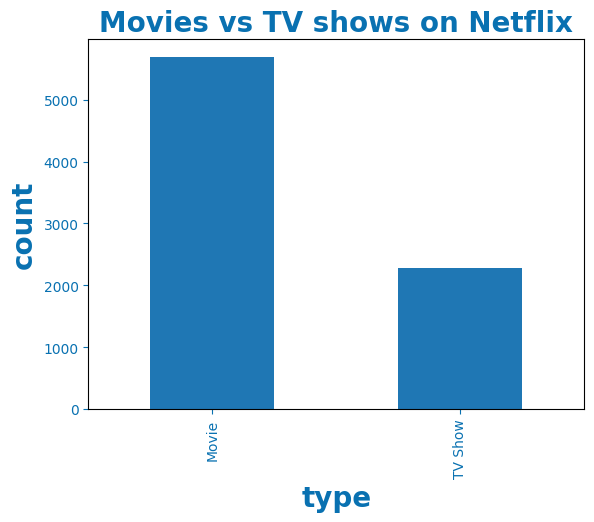

In [2]:
df['type'].value_counts().plot(kind='bar')
plt.title('Movies vs TV shows on Netflix' , fontsize = 20 , fontweight = 'bold',color = "#0971b1")
plt.xlabel('type' , fontsize = 20 , fontweight='bold'  ,  color = "#0971b1")
plt.ylabel('count' , fontsize = 20 , fontweight = 'bold'  , color = "#0971b1")
plt.tick_params(axis='x' , colors = '#0971b1')
plt.tick_params(axis='y' , colors = '#0971b1')
plt.show()

### Insight

The Netflix catalog contains significantly more movies than TV shows. This may be because movies require less long-term commitment compared to TV series, allowing Netflix to add content more frequently.”

# Netflix Yearly Content Growth

The following section tells us how the Netflix content has grown over years.


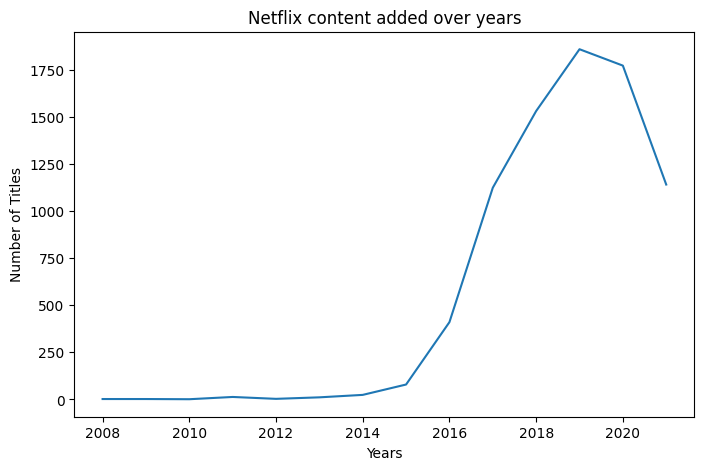

In [3]:
df['year_added'] = df['date_added'].dt.year
yearly_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(8,5))
yearly_counts.plot()
plt.title('Netflix content added over years')
plt.xlabel('Years')
plt.ylabel('Number of Titles')
plt.show()

##Insights

Netflix content additions increased rapidly between 2015 and 2019, indicating a strong expansion phase for the platform. After 2019, the growth rate slows down and slightly declines, which may be influenced by external factors such as market saturation or production constraints during that period.

#Country-wise Content analysis

In this section, I analyzed how different countries contribute to Netflix’s content. Since a single movie or TV show can belong to more than one country, the country column needed some preprocessing before analysis.

To avoid incorrect counts, each country was treated separately.

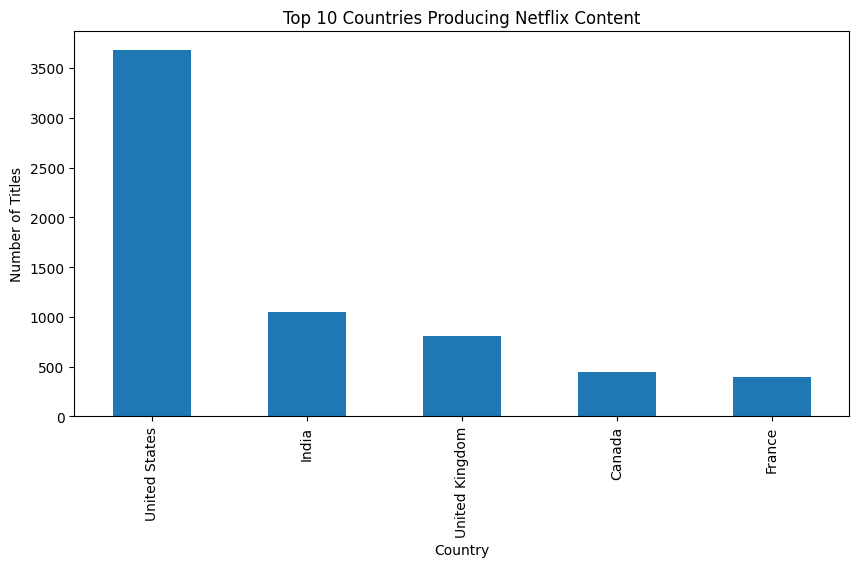

In [4]:
df['country'].head()
df['country_list'] = df['country'].str.split(',')

df['country_list'] = df['country_list'].apply(lambda x : [i.strip() for i in x])

df_exploded = df.explode('country_list')
df_exploded.head()
top_countries = df_exploded['country_list'].value_counts().head()


plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()



#Insights

The United States produces the highest number of Netflix titles, showing its strong dominance on the platform.

India and the United Kingdom also contribute a large amount of content, which highlights Netflix’s focus on expanding in international markets.

The distribution across countries suggests that Netflix is not limited to one region and is gradually building a more global content library.





## Netflix Genre Analysis
In this section, we analyze the most common genres available on Netflix.
This helps us understand what type of content Netflix focuses on the most.


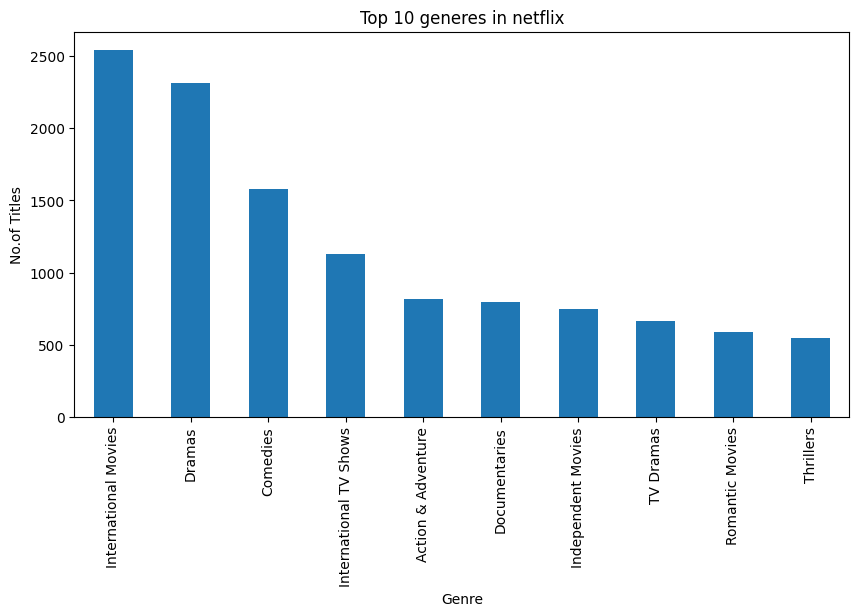

In [5]:
df['listed_in'].head()
df['genre_list'] = df['listed_in'].str.split(',')
df['genre_list'] = df['genre_list'].apply(lambda x : [i.strip() for i in x])
df[['listed_in'  , 'genre_list']].head()


genre_exploded = df.explode('genre_list')
top_genres = genre_exploded['genre_list'].value_counts().head(10)


plt.figure(figsize=(10,5))
top_genres.plot(kind='bar')
plt.title('Top 10 generes in netflix')
plt.xlabel('Genre')
plt.ylabel('No.of Titles')
plt.show()


## Insights
From the analysis, we can see that genres like Dramas, International Movies, and Comedies appear most frequently on Netflix.
This suggests that Netflix focuses more on drama-based and globally appealing content to attract a wide audience.


## Conclusion
In this project, I've analyzed Netflix’s content using exploratory data analysis.
It is observed that movies dominate the platform, content grew rapidly between 2015 and 2019, and the United States contributes the most content.
The analysis also showed that drama and international genres are very common on Netflix.
